# Preprocessing

## Importing Modules

In [1]:
pip install dtreeviz

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.svm import SVR
import seaborn as sns
import warnings
import subprocess


## Importing Dataset

In [3]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Missing Values

In [5]:
df.isna().any().any()

np.False_

## Encoding String Values

In [6]:
#Columns with string values
categorical_column = ['Attrition', 'BusinessTravel', 'Department', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime','EducationField']
encoder=LabelEncoder()
df[categorical_column]=df[categorical_column].apply(encoder.fit_transform)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int64 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int64 
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   int64 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Separating Features from Output

In [8]:
Y=df['Attrition']
X=df.drop(['EmployeeCount','Attrition','EmployeeNumber','Over18','StandardHours'],axis=1)

## Train-Test-Split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

# Decision Tree

### Import Modules

In [10]:
import graphviz
from subprocess import check_call
from IPython.display import Image
import dtreeviz
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text, plot_tree, _tree
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, log_loss
import matplotlib.font_manager
import warnings

## Decision Tree Classifier

Function to Visualize Decision Tree Model

In [11]:
def decision_tree_maker(X_train, Y_train, X_test, Y_test, my_depth=5):
    # Ensure X_train and Y_train are NumPy arrays
    X_train = np.array(X_train) if not isinstance(X_train, np.ndarray) else X_train
    Y_train = np.array(Y_train) if not isinstance(Y_train, np.ndarray) else Y_train
    X_test = np.array(X_test) if not isinstance(X_test, np.ndarray) else X_test
    Y_test = np.array(Y_test) if not isinstance(Y_test, np.ndarray) else Y_test

    # Ensure X_train is 2D and Y_train is 1D
    if X_train.ndim == 1:
        X_train = X_train.reshape(-1, 1)  # Reshape to 2D if it's 1D
    if Y_train.ndim != 1:
        raise ValueError("Y_train must be a 1D array.")

    # Train the model
    dt = DecisionTreeClassifier(random_state=0, max_depth=my_depth, criterion='entropy')
    dt.fit(X_train, Y_train)

    # Test the model
    Y_pred = dt.predict(X_test)

    # Metric evaluation
    dt_accuracy = accuracy_score(Y_test, Y_pred)
    print('Accuracy =', dt_accuracy)
    dt_f1 = f1_score(Y_test, Y_pred, average='binary')  # Specify average for binary classification
    print('F1 Score =', dt_f1)
    dt_precision = precision_score(Y_test, Y_pred, average='binary')  # Specify average for binary classification
    print('Precision =', dt_precision)
    dt_recall = recall_score(Y_test, Y_pred, average='binary')  # Specify average for binary classification
    print('Recall =', dt_recall)
    dt_confusion_matrix = confusion_matrix(Y_test, Y_pred)
    print('Confusion Matrix:\n', dt_confusion_matrix)

    features = ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
    classes = ['No', 'Yes']

    # Text representation of decision tree
    text_representation = export_text(dt, feature_names=features)
    print('------------ Text Representation of Decision Tree ----------')
    print(text_representation)

    # Suppress warnings
    warnings.filterwarnings('ignore', category=DeprecationWarning)

    # Graphical representation of decision tree, save to file 'decision_tree.png'
    dot_data = export_graphviz(dt, out_file='tree.dot', feature_names=features, class_names=classes, filled=True)
    check_call(['dot', '-Tpng', 'tree.dot', '-o', 'C:/Users/mikku/OneDrive/Desktop/Research NTCC/Staff_Atrrition/Imbalanced/decision_tree.png'])

    # Decision tree detailed visualization
    try:
        viz = dtreeviz.model(dt, X_train, Y_train, target_name="Attrition Rate", feature_names=features, class_names=classes)
        return viz
    except Exception as e:
        print(f"Error in dtreeviz: {e}")
        return None

### Train and Test Decision Tree Model

In [12]:
decision_tree_maker(X_train, y_train, X_test, y_test, 4)

Accuracy = 0.8605442176870748
F1 Score = 0.36923076923076925
Precision = 0.5454545454545454
Recall = 0.27906976744186046
Confusion Matrix:
 [[241  10]
 [ 31  12]]
------------ Text Representation of Decision Tree ----------
|--- OverTime <= 0.50
|   |--- TotalWorkingYears <= 2.50
|   |   |--- HourlyRate <= 55.50
|   |   |   |--- EnvironmentSatisfaction <= 3.50
|   |   |   |   |--- class: 1
|   |   |   |--- EnvironmentSatisfaction >  3.50
|   |   |   |   |--- class: 0
|   |   |--- HourlyRate >  55.50
|   |   |   |--- MaritalStatus <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- MaritalStatus >  0.50
|   |   |   |   |--- class: 0
|   |--- TotalWorkingYears >  2.50
|   |   |--- NumCompaniesWorked <= 4.50
|   |   |   |--- WorkLifeBalance <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- WorkLifeBalance >  1.50
|   |   |   |   |--- class: 0
|   |   |--- NumCompaniesWorked >  4.50
|   |   |   |--- Age <= 37.50
|   |   |   |   |--- class: 0
|   |   |   |--- Age >  37.50
|   |   | 

Visualize Decision Tree Model

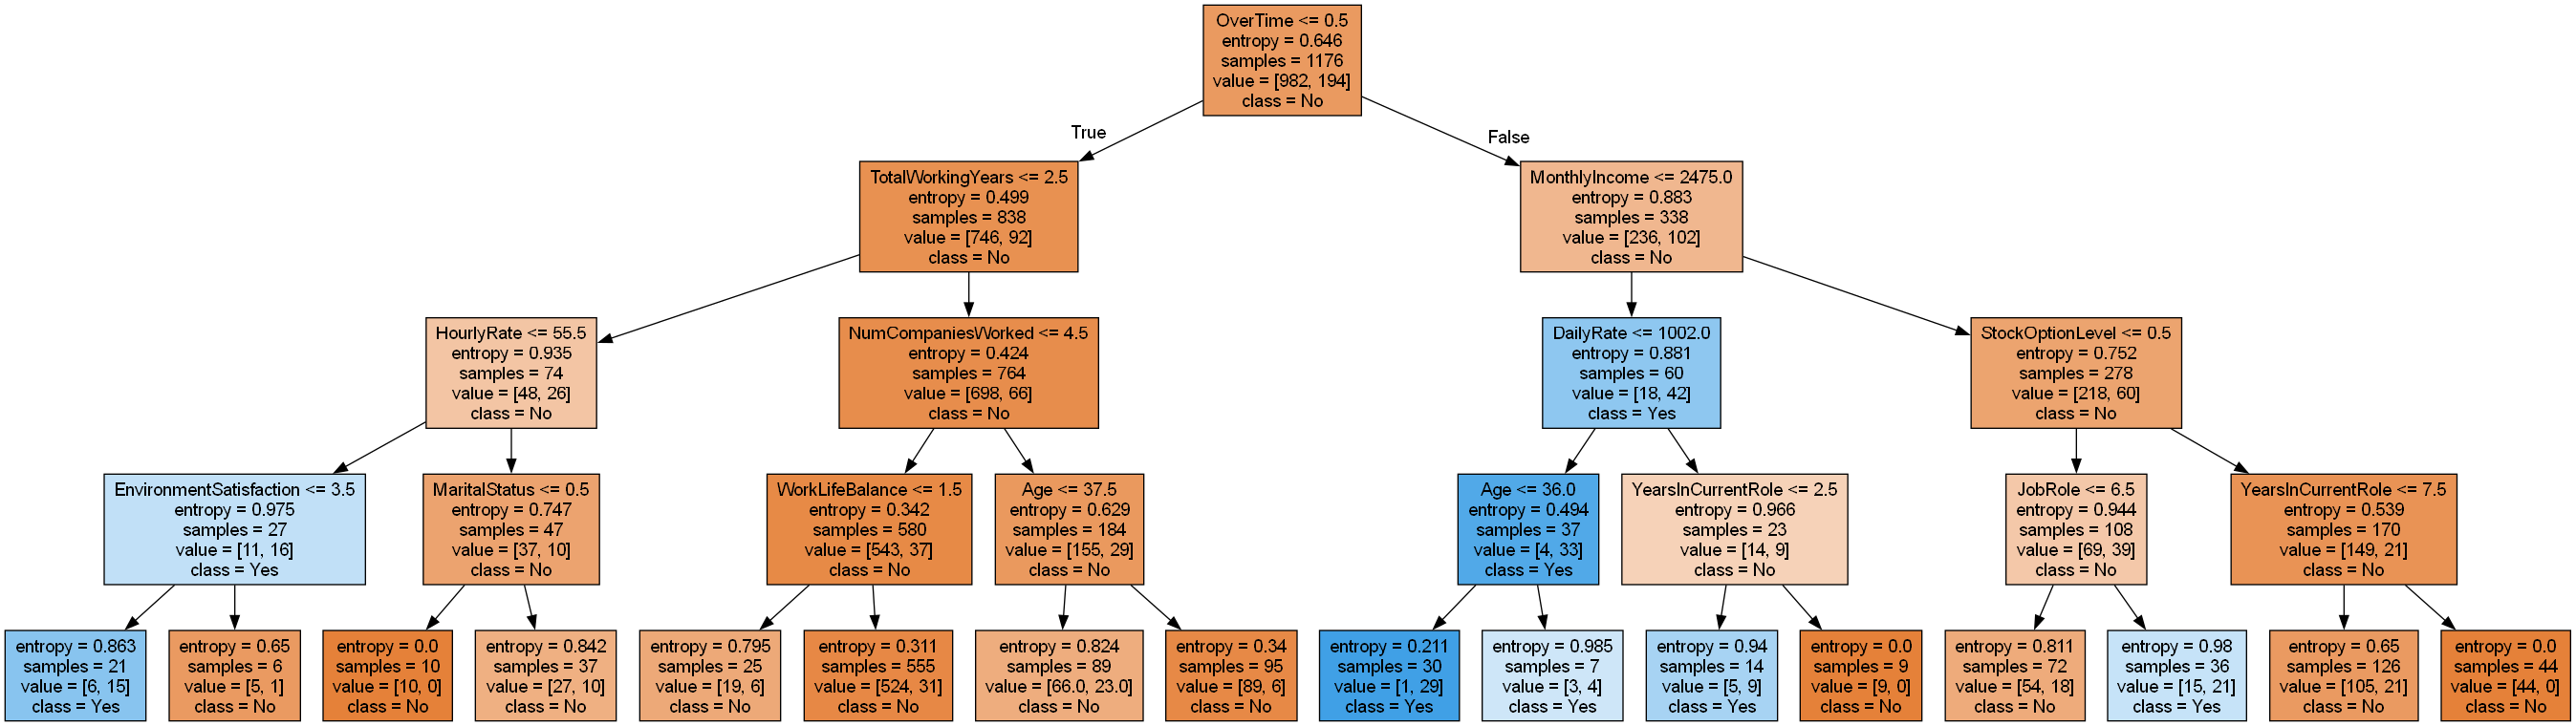

In [13]:
 # graphical represenation of decision tree, view file 'decision_tree.png'
 Image('decision_tree.png')

Function for Feature Importance for Decision Trees

In [14]:
def get_feature_importance(dt, X_train):
  # feature importance
  # The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.
  for importance, name in sorted(zip(dt.feature_importances_, X_train.columns), reverse=True):
    print(name, importance)

  # plot
  plt.xticks(rotation='vertical')
  plt.bar(X_train.columns, dt.feature_importances_, align='edge', width=0.3)
  plt.xlabel("Features")
  plt.ylabel("Importance")
  plt.title("Feature Importance for the Decision tree")
  plt.show()

## Hyperparameter Tuning using GridSearch CV 

Analyzing Accuracy with Depth of Decision Tree

[]

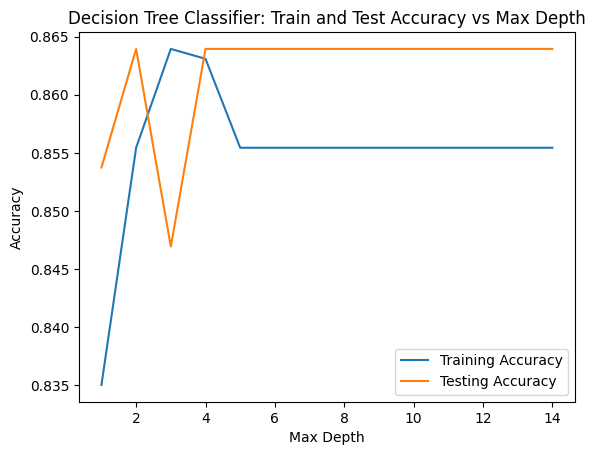

In [15]:
dt_train_accuracy = []
dt_test_accuracy = []

# do GridSearch CV over different values
for i in np.arange(1, 15):
  param_grid = {'criterion':['entropy','gini'],'max_depth': [i],'max_leaf_nodes':[5, 10, 20, 50, 100],'random_state':[0]}
  dt = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5)
  dt.fit(X_train,y_train)
  y_train_pred = dt.predict(X_train)
  y_pred = dt.predict(X_test)
  s = accuracy_score(y_train, y_train_pred)
  dt_train_accuracy.append(s)
  dt_test_accuracy.append(accuracy_score(y_test, y_pred))

# plot graph
plt.title("Decision Tree Classifier: Train and Test Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.plot(np.arange(1,15), dt_train_accuracy, label="Training Accuracy")
plt.plot(np.arange(1,15), dt_test_accuracy, label="Testing Accuracy")
plt.legend()
plt.plot()

In [16]:
# print values at max depth = 4
print('Train Accuracy at max depth = 4 : ', dt_train_accuracy[3])
print('Train Accuracy at max depth = 4 : ', dt_test_accuracy[3])

Train Accuracy at max depth = 4 :  0.8630952380952381
Train Accuracy at max depth = 4 :  0.8639455782312925


Function for Grid Search CV

In [24]:
# performing GridSearchCV on data to get best model hyperparameters
def gcv(X_train, Y_train, X_test, Y_test):

  # make scorer
  scoring = make_scorer(accuracy_score)

  # define parameters
  max_depth = [int(x) for x in np.linspace(2, 15, num=10)] 
  # max_depth.append(None)

  # perform GridSearchCV with given parameters
  g_cv = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                param_grid={'criterion': ['gini', 'entropy'],
                            'max_depth': max_depth,
                            'max_features': ['log2', 'sqrt', 0.33334],
                            'min_samples_leaf': [1, 2, 5, 10, 15, 20],
                            'min_samples_split': range(2, 10),
                            'max_leaf_nodes': [5, 10, 20, 50, 100],
                            'random_state': [0]},
                scoring=scoring, cv=5, refit=True)

  g_cv.fit(X_train, Y_train)

  # get best parameter values
  print(g_cv.best_params_)

  # train new model with best parameters
  dt_classifier = DecisionTreeClassifier(**g_cv.best_params_).fit(X_train, Y_train)
  Y_pred = dt_classifier.predict(X_test)
  dt_accuracy = accuracy_score(Y_test, Y_pred)
  print('Accuracy = ', dt_accuracy)
  dt_f1 = f1_score(Y_test, Y_pred)
  print('F1 Score = ', dt_f1)
  dt_precision = precision_score(Y_test, Y_pred)
  print('Precision = ', dt_precision)
  dt_recall = recall_score(Y_test, Y_pred)
  print('Recall = ', dt_recall)
  return dt_classifier, g_cv.best_params_, dt_accuracy

Run Grid Search CV

In [25]:
dt_classifier, best_params_raw, accuracy_cv = gcv(X_train, y_train, X_test, y_test)

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 0.33334, 'max_leaf_nodes': 50, 'min_samples_leaf': 15, 'min_samples_split': 2, 'random_state': 0}
Accuracy =  0.8605442176870748
F1 Score =  0.36923076923076925
Precision =  0.5454545454545454
Recall =  0.27906976744186046


### Visualizing Decision Tree Model 

Decision Tree Model with Best Parameters

In [19]:
# train new model with best parameters
dt_classifier = DecisionTreeClassifier(**best_params_raw).fit(X_train, y_train)
Y_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, Y_pred)
print('Accuracy = ', dt_accuracy)
dt_f1 = f1_score(y_test, Y_pred)
print('F1 Score = ', dt_f1)
dt_precision = precision_score(y_test, Y_pred)
print('Precision = ', dt_precision)
dt_recall = recall_score(y_test, Y_pred)
print('Recall = ', dt_recall)
features = ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',  'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',  'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',  'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
classes = ['No', 'Yes']
warnings.filterwarnings('ignore', category=DeprecationWarning)


# graphical represenation of decision tree, save to file 'decision_tree.png'
dot_data = export_graphviz(dt_classifier, out_file ='tree_best.dot', feature_names=features, class_names=classes)
check_call(['dot','-Tpng','tree_best.dot','-o','decision_tree_best.png'])
dtreeviz.model(dt_classifier, X_train, y_train, target_name="Attrition Rate",feature_names=features, class_names=classes)

Accuracy =  0.8605442176870748
F1 Score =  0.36923076923076925
Precision =  0.5454545454545454
Recall =  0.27906976744186046


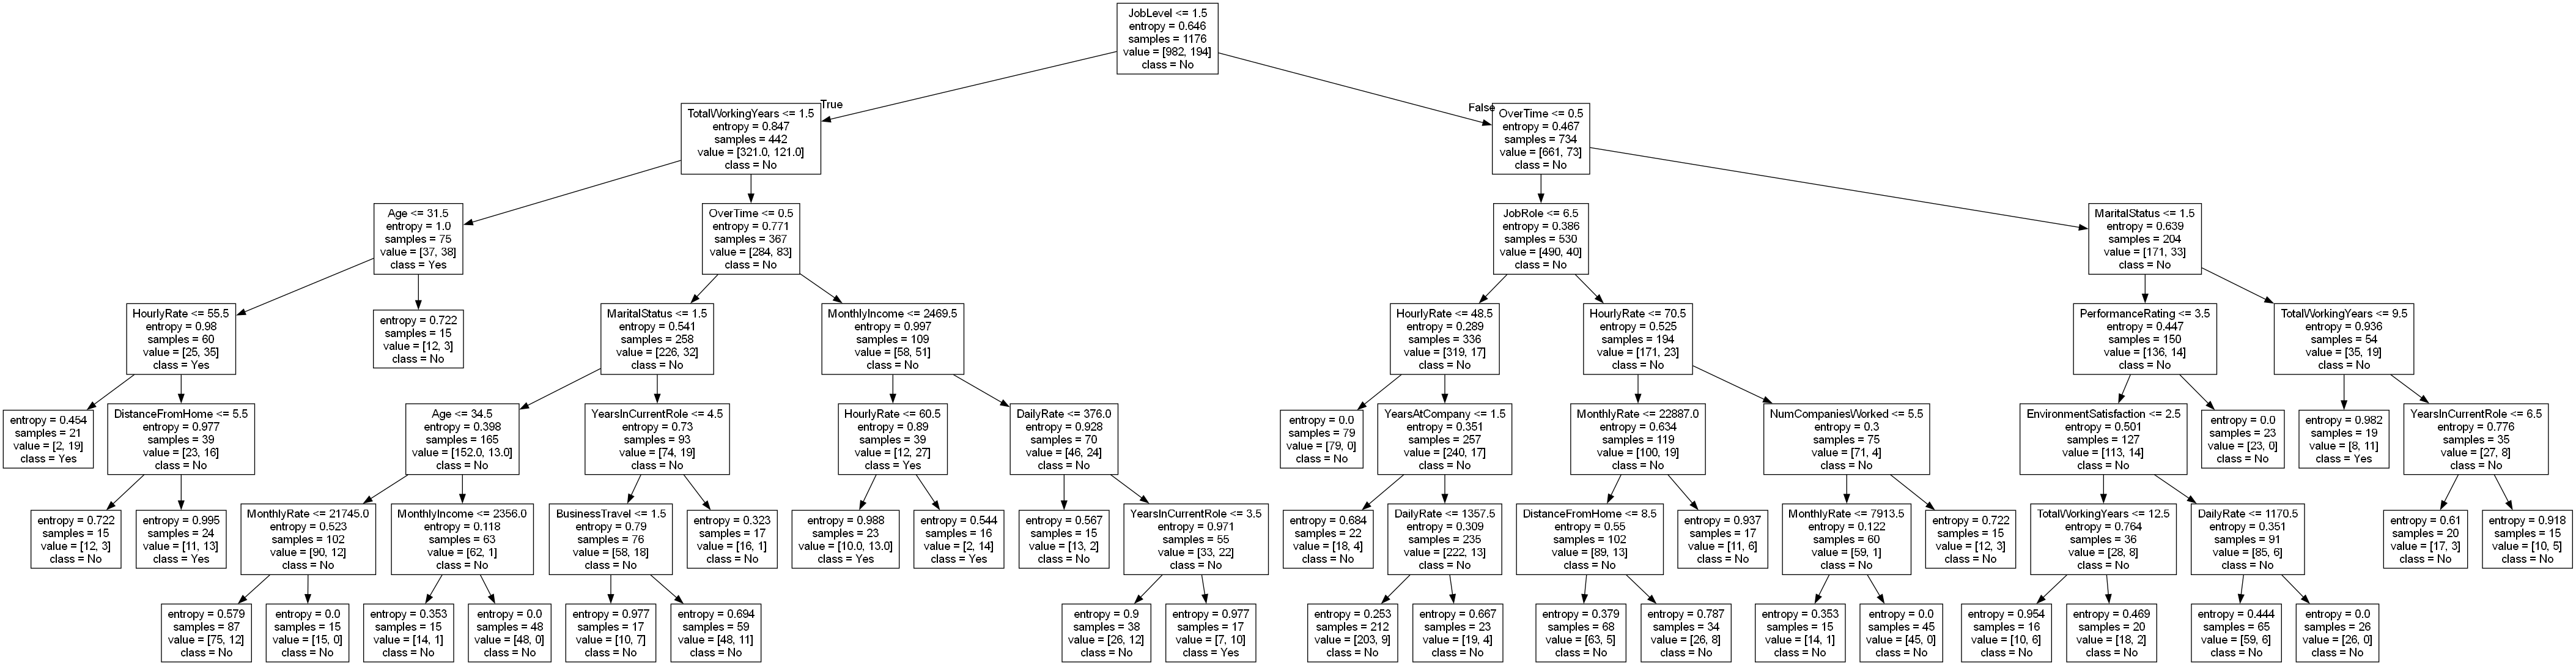

In [20]:
Image('decision_tree_best.png')

### Feature Importance

OverTime 0.18807682503082984
JobLevel 0.18606637229646517
HourlyRate 0.11046523094092504
TotalWorkingYears 0.10433895719691405
MaritalStatus 0.08122816195903686
MonthlyIncome 0.048710840798034206
Age 0.0451420453382476
DailyRate 0.0416632010272737
MonthlyRate 0.03635675260192595
DistanceFromHome 0.030599166695284837
YearsInCurrentRole 0.027102883348881245
JobRole 0.024621130431313674
NumCompaniesWorked 0.019098779227637804
EnvironmentSatisfaction 0.018241465325991767
PerformanceRating 0.01551879434350622
YearsAtCompany 0.01199702234813787
BusinessTravel 0.010772371089594108
YearsWithCurrManager 0.0
YearsSinceLastPromotion 0.0
WorkLifeBalance 0.0
TrainingTimesLastYear 0.0
StockOptionLevel 0.0
RelationshipSatisfaction 0.0
PercentSalaryHike 0.0
JobSatisfaction 0.0
JobInvolvement 0.0
Gender 0.0
EducationField 0.0
Education 0.0
Department 0.0


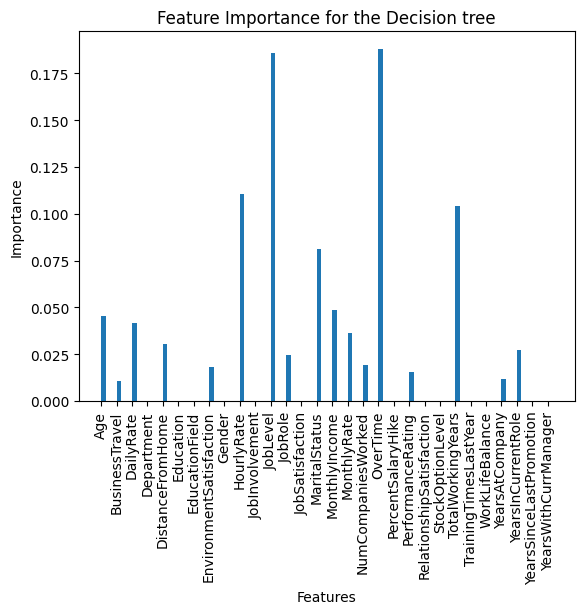

In [21]:
get_feature_importance(dt_classifier, X_train)

## K Fold Cross Validation

In [22]:
def cross_validation(model, X, y, my_cv = 5):
  scores = cross_validate(model, X, y, cv=my_cv, scoring=('accuracy','precision','recall','f1'))
  print(scores)
  print("Accuracy: ", np.mean(scores['test_accuracy']))
  print("Precision: ", np.mean(scores['test_precision']))
  print("Recall: ", np.mean(scores['test_recall']))
  print("F1 Score: ", np.mean(scores['test_f1']))

### Performing K Fold Cross Validation with above Hyperparameters

In [23]:
cross_validation(DecisionTreeClassifier(**best_params_raw), X, Y, 5)

{'fit_time': array([0.00714064, 0.00610399, 0.00571108, 0.00531745, 0.00621653]), 'score_time': array([0.00832248, 0.00775266, 0.00752902, 0.00856805, 0.00686789]), 'test_accuracy': array([0.84353741, 0.84693878, 0.84013605, 0.80272109, 0.84693878]), 'test_precision': array([0.54545455, 0.58823529, 0.5       , 0.32258065, 0.53571429]), 'test_recall': array([0.25      , 0.20833333, 0.40425532, 0.21276596, 0.31914894]), 'test_f1': array([0.34285714, 0.30769231, 0.44705882, 0.25641026, 0.4       ])}
Accuracy:  0.8360544217687075
Precision:  0.49839695408955376
Recall:  0.2789007092198582
F1 Score:  0.35080370609782374
